In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

C:\Users\APC\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
props_2017 = pd.read_csv("./../data/properties_2017.csv")
train_2017 = pd.read_csv("./../data/train_2017.csv")
sample = pd.read_csv("./../data/sample_submission.csv")

sample['parcelid'] = sample['ParcelId']
sample = sample.drop(['ParcelId'],axis=1)

<ipython-input-2-6cb74deb2fba>:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  props_2017 = pd.read_csv("./../data/properties_2017.csv")


# REDUCE MEMORY USAGE

In [3]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
#             # Print current column type
#             print("******************************")
#             print("Column: ",col)
#             print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype('int64')
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                    props[col] = props[col].astype('Int8')
                elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                    props[col] = props[col].astype('Int16')
                elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                    props[col] = props[col].astype('Int32')
                elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                    props[col] = props[col].astype('Int64')    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype('float32')
            
#             # Print new column type
#             print("dtype after: ",props[col].dtype)
#             print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props

In [4]:
props_2017 = reduce_mem_usage(props_2017)

Memory usage of properties dataframe is : 1320.9732208251953  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  620.6297245025635  MB
This is  46.982763519979905 % of the initial size


<ipython-input-5-b808c1565648>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=props_2017[numcols].corr())


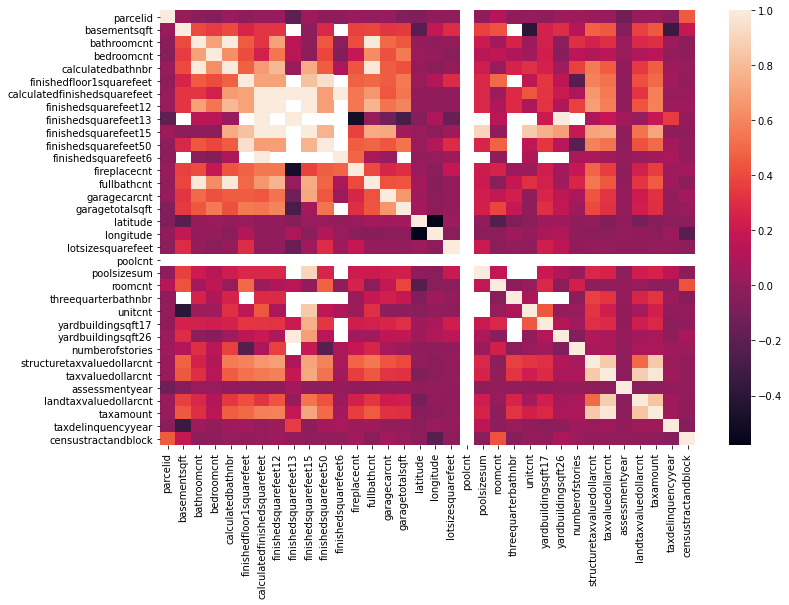

<Figure size 432x288 with 0 Axes>

In [5]:
#Identify numerical columns to produce a heatmap
#remove id, bool, year
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in props_2017.columns if x not in catcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=props_2017[numcols].corr())
plt.show()
plt.gcf().clear()

In [6]:
missingvalues_prop = (props_2017.isnull().sum()/len(props_2017)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
missingvalues_prop

,field,proportion
41,storytypeid,0.999456
3,basementsqft,0.999455
46,yardbuildingsqft26,0.999114
49,fireplaceflag,0.998270
2,architecturalstyletypeid,0.997970
43,typeconstructiontypeid,0.997740
13,finishedsquarefeet13,0.997430
6,buildingclasstypeid,0.995735
29,pooltypeid10,0.994303
9,decktypeid,0.994178


In [7]:
def preprocess(df):
    dropcols = []

    # too many missing values and same info with 'calculatedfinishedsquarefeet'  
    dropcols =  dropcols + ['finishedsquarefeet13','finishedsquarefeet15','finishedfloor1squarefeet','finishedsquarefeet50','finishedsquarefeet6','finishedsquarefeet12','basementsqft','yardbuildingsqft26']

    #too many missing values and same info with  pooltypid2
    dropcols = dropcols + ['pooltypeid10', 'pooltypeid7', 'hashottuborspa']

    # 99% missing values and cannot impute data because this is ID
    dropcols = dropcols + ['storytypeid', 'buildingclasstypeid', 'architecturalstyletypeid','typeconstructiontypeid']


    #same information with fireplacecnt
    dropcols.append('fireplaceflag')

    #same information with bathroomcnt 
    dropcols = dropcols + ['threequarterbathnbr', 'calculatedbathnbr', 'fullbathcnt']


    # same information with the sum of structuretaxvaluedollarcnt and landtaxvaluedollarcnt
    dropcols = dropcols + ['taxvaluedollarcnt', 'taxamount']

    # propertylandusetypeid already provides similar information
    dropcols = dropcols + ['propertyzoningdesc', 'propertycountylandusecode']

    # regionidcounty, latitude, longitude already provides similar information, are better region based features 
    # over 60% of the dataset missing values and 500+ unique value
    dropcols = dropcols + ['regionidneighborhood', 'regionidzip', 'regionidcity']

    #taxdelinquencyflag provides same information
    #over 97%
    dropcols.append('taxdelinquencyyear')

    #Duplicate information from bedroomcnt and roomcnt shows inconsistent data with majority of properties having 0 rooms in the principal residence
    dropcols.append('roomcnt')

    #With over 77% of the missing values and no one value dominating the variable distribution, it is impractical to impute and introduce incorrect information.
    dropcols.append('numberofstories')

    #Dropping as the variable has only one unique value in the dataset.
    dropcols.append('assessmentyear')

    #With almost 58k unique values, these features are being dropped until further research can be done into incorporating information from them in the model algorithm.
    dropcols.append('rawcensustractandblock')
    dropcols.append('censustractandblock')
    
    ### 0 IMPUTATION

    #Data description says 'Patio in yard'. Missing values are likely zero for having no patio in yard
    index = df.yardbuildingsqft17.isnull()
    df.loc[index,'yardbuildingsqft17'] = 0

    #Missing values must indicate no fireplace present in the unit, thus imputing 0 for all missing values.
    index = df.fireplacecnt.isnull()
    df.loc[index,'fireplacecnt'] = 0

    #All values are 1 in data indicating one pool is present, missing values must be 0 indicating otherwise.
    index = df.poolcnt.isnull()
    df.loc[index,'poolcnt'] = 0

    #All missing values indicate no pool on property, thus impute 0 for sqaure footage of all pools.
    index = df.poolsizesum.isnull()
    df.loc[index,'poolsizesum'] = 0

    #All values are 1 in data indicating a pool with spa/hot tub is present, missing values must be 0 indicating otherwise.
    index = df.pooltypeid2.isnull()
    df.loc[index,'pooltypeid2'] = 0

    #Same value in data indicating a deck is present, missing values must be 0 indicating no deck.
    index = df.decktypeid.isnull()
    df.loc[index,'decktypeid'] = 0

    #Assume if Null in garage count it means there are no garages
    index = df.garagecarcnt.isnull()
    df.loc[index,'garagecarcnt'] = 0

    #Likewise no garage means the size is 0 by default
    index = df.garagetotalsqft.isnull()
    df.loc[index,'garagetotalsqft'] = 0

    #All values are Y in data for properties that are tax delinquent implying all missing values must be N or 0 for easier handling
    index = df.taxdelinquencyflag.isnull()
    df.loc[index,'taxdelinquencyflag'] = 'N'
    df.loc[df['taxdelinquencyflag'] == 'Y','taxdelinquencyflag'] = 1
    df.loc[df['taxdelinquencyflag'] == 'N','taxdelinquencyflag'] = 0
    df['taxdelinquencyflag'] = df['taxdelinquencyflag'].astype('int32')


    ### Mode Imputation Features
    # The following features are imputed with the most frequent value (mode) due to the majority of the dataset having that specific value.

    # airconditioningtypeid: Majority of the properties have a Central air conditioning type.
    df['airconditioningtypeid'] = df['airconditioningtypeid'].fillna(df['airconditioningtypeid'].mode()[0])

    # heatingorsystemtypeid: Majority of the properties have a Central heating system.
    df['heatingorsystemtypeid'] = df['heatingorsystemtypeid'].fillna(df['heatingorsystemtypeid'].mode()[0])

    # unitcnt: Majority of the property are built into 1 unit.
    df['unitcnt'] = df['unitcnt'].fillna(df['unitcnt'].mode()[0])

    # yearbuilt: Since missing rows is extremely low, mode suffices
    df['yearbuilt'] = df['yearbuilt'].fillna(df['yearbuilt'].mode()[0])
    # most people care about the age than year built
    df['age'] = 2017-df['yearbuilt']
    dropcols.append('yearbuilt')
    
    #fips, propertylandusetypeid, regionidcounty: With only 0.4% of the dataset missing values, imputing the mode is acceptable.
    df['fips'] = df['fips'].fillna(df['fips'].mode()[0])
    df['propertylandusetypeid'] = df['propertylandusetypeid'].fillna(df['propertylandusetypeid'].mode()[0])
    df['regionidcounty'] = df['regionidcounty'].fillna(df['regionidcounty'].mode()[0])


    ### Median Imputation Features
    #The following features are imputing with the 50th percentile value (median) to best represent the numerical distributions represented by each features.

    # buildingqualitytypeid: Overall condition of the condition from best (lowest) to worst (highest). Thus, imputing the median for missing values.
    df['buildingqualitytypeid'] = df['buildingqualitytypeid'].fillna(df['buildingqualitytypeid'].median())

    # lotsizesquarefeet: Continuous numerical variable for area of the lot
    df['lotsizesquarefeet'] = df['lotsizesquarefeet'].fillna(df['lotsizesquarefeet'].median())

    # calculatedfinishedsquarefeet
    df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].median())

    # structuretaxvaluedollarcnt
    df['structuretaxvaluedollarcnt'] = df['structuretaxvaluedollarcnt'].fillna(int(df['structuretaxvaluedollarcnt'].median()))

    #landtaxvaluedollarcnt
    df['landtaxvaluedollarcnt'] = df['landtaxvaluedollarcnt'].fillna(df['landtaxvaluedollarcnt'].median())
    
    #bathroomcnt
    df['bathroomcnt'] = df['bathroomcnt'].fillna(df['bathroomcnt'].median())
    
    #bedroomcnt
    df['bedroomcnt'] = df['bedroomcnt'].fillna(df['bedroomcnt'].median())
    
    #latitude
    df['latitude'] = df['latitude'].fillna(df['latitude'].median())
    
    #longitude
    df['longitude'] = df['longitude'].fillna(int(df['longitude'].median()))
    
    df = df.drop(dropcols,axis=1)
    
    #labeler categorical columns
    cate_cols = ['fips','regionidcounty','propertylandusetypeid']
    for feature in cate_cols:
        lbl = LabelEncoder()
        lbl.fit(list(df[feature].values))
        df[feature] = lbl.transform(list(df[feature].values))
    return df

In [8]:
preprocessed_props_2017 = preprocess(props_2017)

In [14]:
df_train_2017 = train_2017.merge(preprocessed_props_2017, how='left', on='parcelid')
df_train_2017 = df_train_2017.drop(['parcelid', 'transactiondate'], axis=1)

df_predict_2017 = sample.merge(preprocessed_props_2017, how='left', on='parcelid')
df_predict_2017 = df_predict_2017.drop(['201610','201611','201612','201710','201711','201712'], axis=1)

In [15]:
df_train_2017.to_csv('./../preprocessed data/df_train_2017_xgb.csv',index=False)
df_predict_2017.to_csv('./../preprocessed data/df_predict_2017_xgb.csv',index=False)